In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plotimage(X,y,index):
    plt.figure(figsize=(15,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

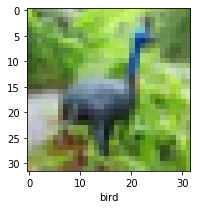

In [ ]:
plotimage(X_train,y_train,6)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.5497 - accuracy: 0.8067
Epoch 2/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.5132 - accuracy: 0.8198
Epoch 3/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.4874 - accuracy: 0.8290
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.4539 - accuracy: 0.8428
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.4253 - accuracy: 0.8491
Epoch 6/10
1148/1563 [=====================>........] - ETA: 19s - loss: 0.3857 - accuracy: 0.8626

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_classes = [np.argmax(element) for element in y_pred]

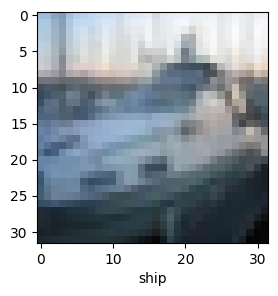

In [ ]:
plotimage(X_test,y_test,2)

In [ ]:
classes[y_classes[2]]

'airplane'